In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import statsmodels.api as sm
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns

In [2]:
df = pd.read_excel('FinalPE.xlsx')

In [3]:
df

,Date,provincename,Construction,Transportation,Agriculture,Population,Station Name,Max Temp (Â°C),Total Snow (cm),Total Precip (mm),Min Temp (Â°C),Mean Temp (Â°C),Heat Deg Days (°C),Cool Deg Days (Â°C),Longitude (x),Latitude (y)
0,2013-01-01,Prince Edward Island,57.550734,32.613726,15.671748,36094,Charlottetown,-4.1,1.266667,0.4,-13.2,-8.7,26.7,0.0,-63.12,46.29
1,2013-02-01,Prince Edward Island,57.536642,29.378290,17.930853,36094,Charlottetown,-8.4,1.085714,0.0,-20.5,-14.5,32.5,0.0,-63.12,46.29
2,2013-03-01,Prince Edward Island,64.042215,28.445047,18.700114,36094,Charlottetown,-0.6,0.950000,3.2,-3.0,-1.8,19.8,0.0,-63.12,46.29
3,2013-04-01,Prince Edward Island,71.880328,26.940856,16.950071,36094,Charlottetown,5.0,1.111111,1.0,-2.3,1.4,16.6,0.0,-63.12,46.29
4,2013-05-01,Prince Edward Island,63.230157,28.745911,13.950596,36094,Charlottetown,15.3,1.000000,0.0,1.1,8.2,9.8,0.0,-63.12,46.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2021-08-01,Prince Edward Island,26.227441,12.799387,17.757224,14829,Summerside,24.0,1.920625,0.0,13.8,18.9,0.0,0.9,-63.84,46.44
428,2021-09-01,Prince Edward Island,27.517951,13.727674,14.066450,14829,Summerside,23.5,1.089583,0.0,15.2,19.4,0.0,1.4,-63.84,46.44
429,2021-10-01,Prince Edward Island,29.593346,12.258328,16.904419,14829,Summerside,14.7,0.638281,0.0,10.0,12.4,5.6,0.0,-63.84,46.44
430,2021-11-01,Prince Edward Island,33.425214,10.767630,19.232624,14829,Summerside,16.0,0.215179,0.0,6.6,11.3,6.7,0.0,-63.84,46.44


In [4]:
df.set_index('Date', inplace=True)

In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 432 entries, 2013-01-01 to 2021-12-01
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   provincename         432 non-null    object 
 1   Construction         432 non-null    float64
 2   Transportation       432 non-null    float64
 3   Agriculture          432 non-null    float64
 4   Population           432 non-null    int64  
 5   Station Name         432 non-null    object 
 6   Max Temp (Â°C)       432 non-null    float64
 7   Total Snow (cm)      432 non-null    float64
 8   Total Precip (mm)    432 non-null    float64
 9   Min Temp (Â°C)       432 non-null    float64
 10  Mean Temp (Â°C)      432 non-null    float64
 11  Heat Deg Days (°C)   432 non-null    float64
 12  Cool Deg Days (Â°C)  432 non-null    float64
 13  Longitude (x)        432 non-null    float64
 14  Latitude (y)         432 non-null    float64
dtypes: float64(12), int64

In [7]:
unique_station_names = df['Station Name'].unique()
productivity_columns = ['Construction',  'Transportation', 'Agriculture']


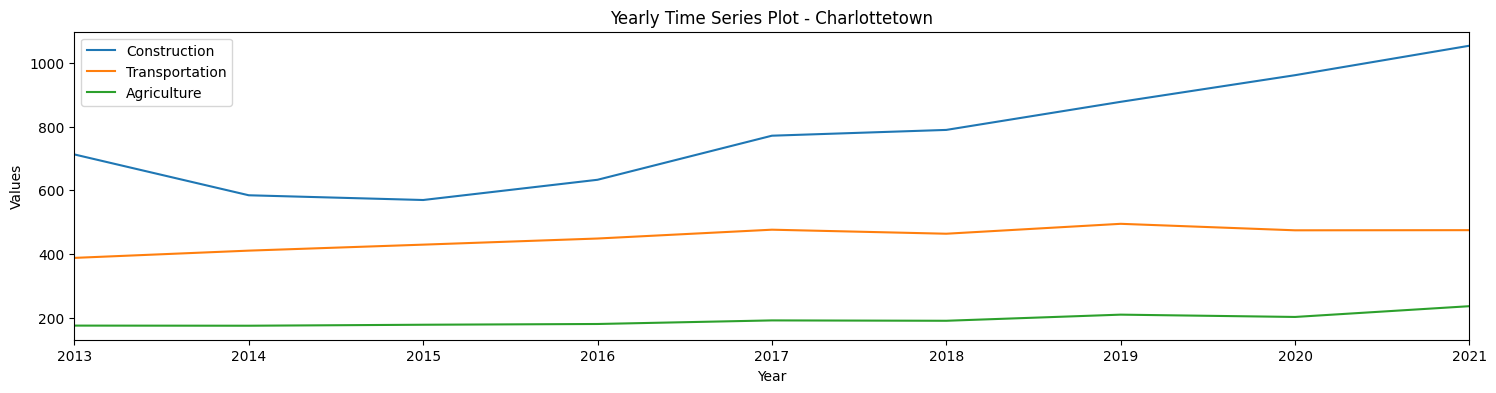

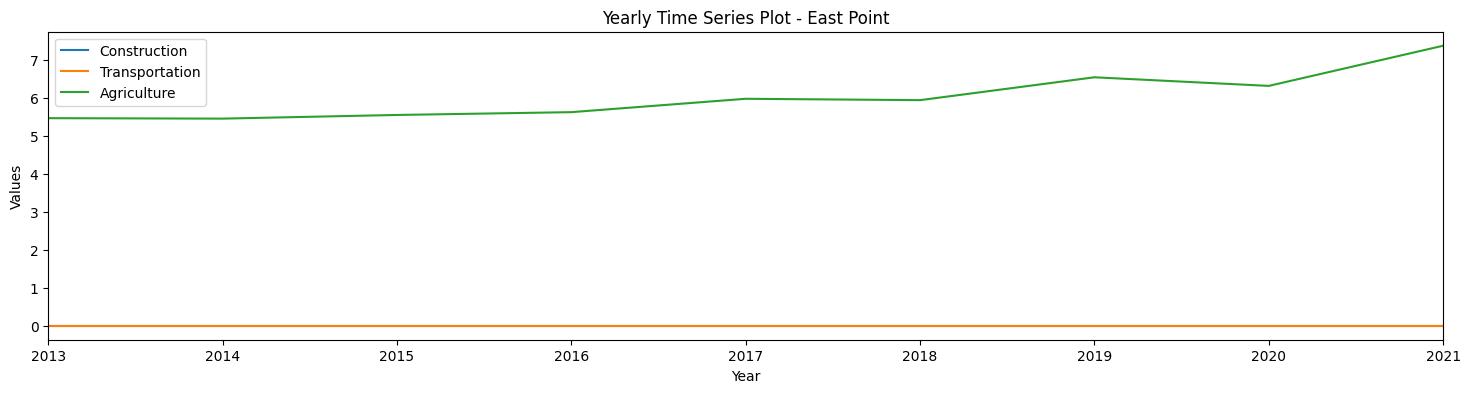

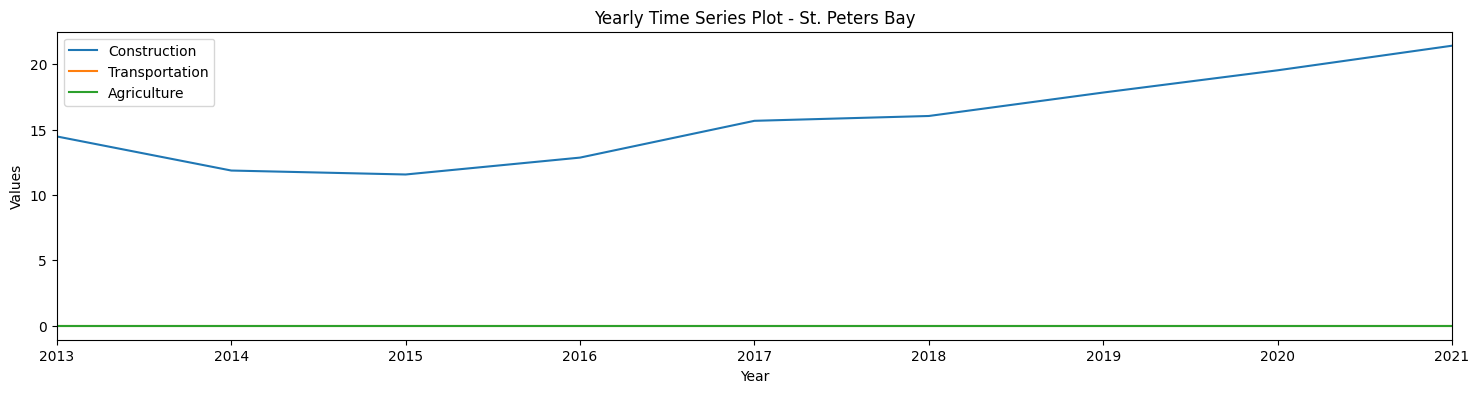

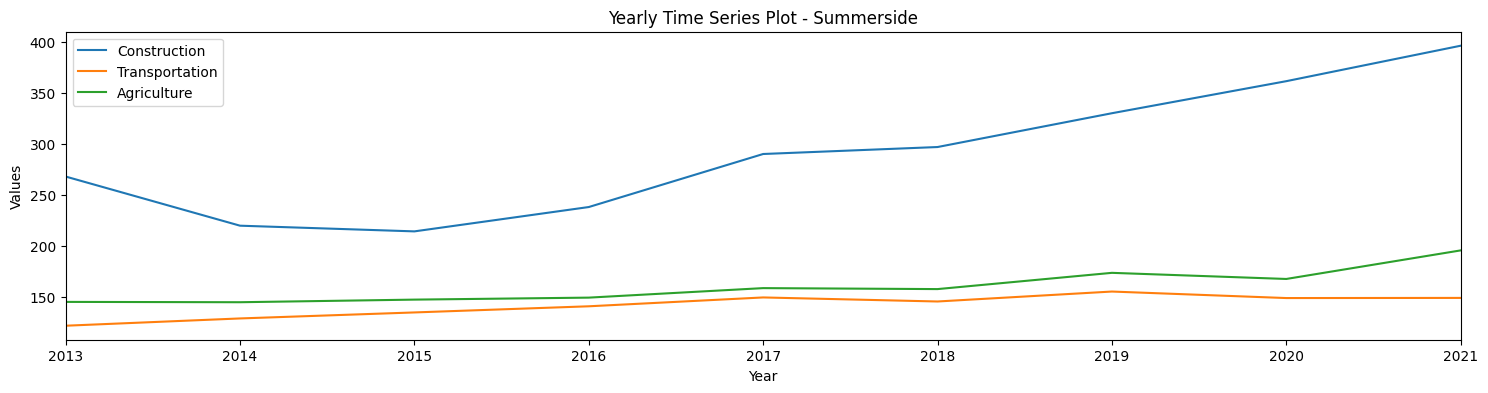

In [8]:
for station_name in unique_station_names:
    station_data = df[df['Station Name'] == station_name]
    yearly_data = station_data[productivity_columns].resample('Y').sum()
    yearly_data.plot(figsize=(18, 4), title=f'Yearly Time Series Plot - {station_name}')
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.show()

# ARIMA 
## Construction Peters Bay - ON


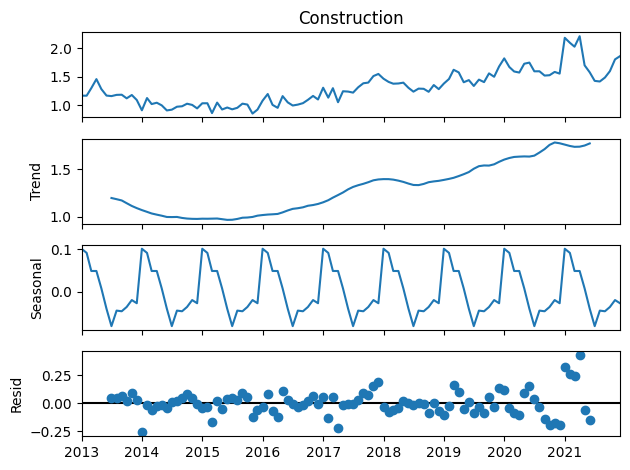

In [9]:
ConstructionPetersBay = pd.read_excel('FinalPE.xlsx')
Construction_PetersBay = ConstructionPetersBay[ConstructionPetersBay['Station Name'] == 'St. Peters Bay'][['Date', 'Construction']]
Construction_PetersBay.set_index('Date', inplace=True)
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(Construction_PetersBay['Construction'],
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [10]:
#Ho null hypostheis : It is non stationary
#H1 Alternate hypoyhesis : It is stationary
from statsmodels.tsa.stattools import adfuller
def adfuller_test(y):
    result=adfuller(y)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
adfuller_test(Construction_PetersBay['Construction'])    

ADF Test Statistic : -0.211068244270494
p-value : 0.9371893882162159
#Lags Used : 7
Number of Observations Used : 100
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [11]:
Construction_PetersBay['Construction-diff'] = Construction_PetersBay['Construction'] - Construction_PetersBay['Construction'].shift(1)

In [12]:
adfuller_test(Construction_PetersBay['Construction-diff'].dropna())

ADF Test Statistic : -6.727994695362681
p-value : 3.3514293452590975e-09
#Lags Used : 6
Number of Observations Used : 100
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

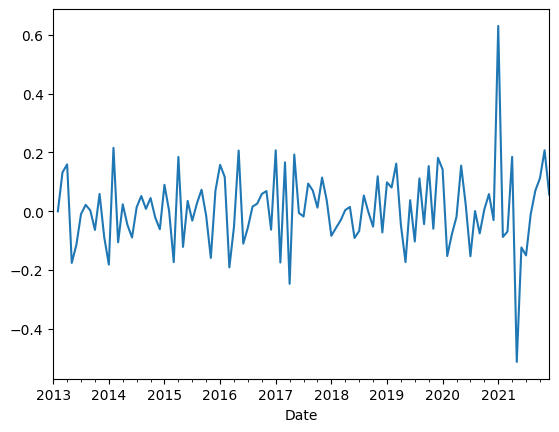

In [13]:
Construction_PetersBay['Construction-diff'].plot()

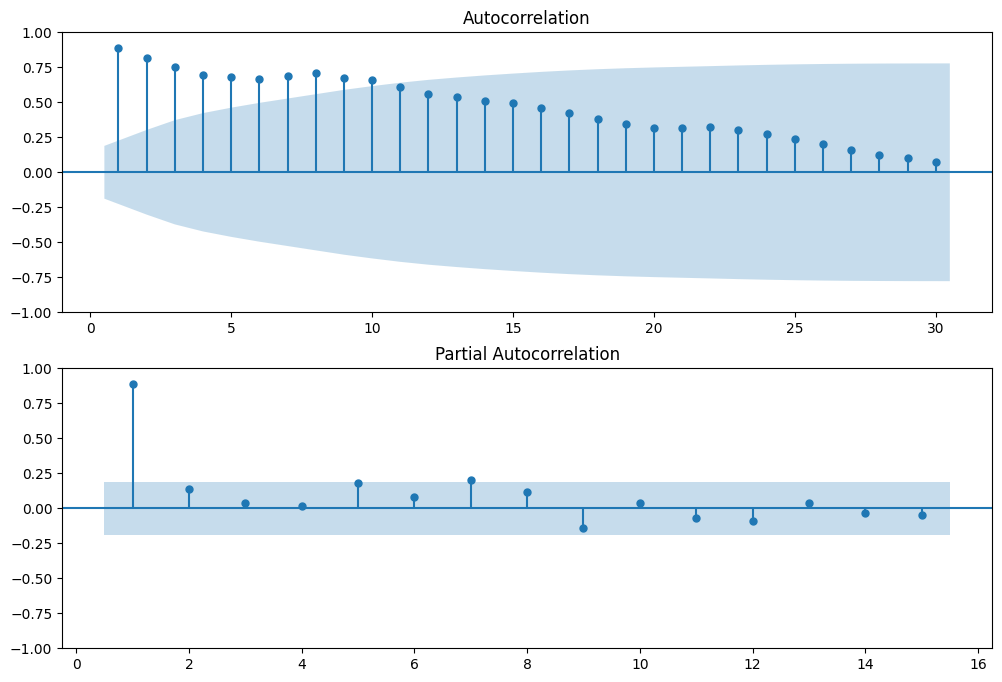

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(Construction_PetersBay['Construction'],zero=False,lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(Construction_PetersBay['Construction'],zero= False,lags=15,ax=ax2)


In [18]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(2):
# Loop over q values from 0-2
    for q in range(5):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = sm.tsa.ARIMA(Construction_PetersBay['Construction'], order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

In [19]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
9  1  4 -130.158196 -111.383277
6  1  1 -129.991896 -119.263371
5  1  0 -129.398035 -121.351641
7  1  2 -128.212012 -114.801356
8  1  3 -127.709252 -111.616464
4  0  4 -100.144453  -84.051666
3  0  3  -92.031685  -78.621029
2  0  2  -67.788944  -57.060419
1  0  1  -33.885261  -25.838867
0  0  0   47.870266   53.234529
   p  q         AIC         BIC
5  1  0 -129.398035 -121.351641
6  1  1 -129.991896 -119.263371
7  1  2 -128.212012 -114.801356
8  1  3 -127.709252 -111.616464
9  1  4 -130.158196 -111.383277
4  0  4 -100.144453  -84.051666
3  0  3  -92.031685  -78.621029
2  0  2  -67.788944  -57.060419
1  0  1  -33.885261  -25.838867
0  0  0   47.870266   53.234529


In [20]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.ARIMA(Construction_PetersBay['Construction'], order=(1, 1, 4))
# Fit the model
results_ARIMAX = model.fit()

# Print model fit summary
print(results_ARIMAX.summary())

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Construction   No. Observations:                  108
Model:                 ARIMA(1, 1, 4)   Log Likelihood                  72.722
Date:                Sat, 16 Mar 2024   AIC                           -133.443
Time:                        23:07:47   BIC                           -117.406
Sample:                    01-01-2013   HQIC                          -126.942
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3509      0.373      0.940      0.347      -0.381       1.082
ma.L1         -0.6305      0.389     -1.623      0.105      -1.392       0.131
ma.L2          0.0602      0.175      0.344      0.7

In [21]:
from datetime import datetime, timedelta
import pandas as pd

# Convert index to DateTimeIndex
Construction_PetersBay.index = pd.to_datetime(Construction_PetersBay.index)

train_dataset_end = datetime(2021, 6, 1)
test_dataset_end = datetime(2021, 12, 1)

train_data = Construction_PetersBay[Construction_PetersBay.index <= train_dataset_end]
test_data = Construction_PetersBay[(Construction_PetersBay.index > train_dataset_end) & (Construction_PetersBay.index <= test_dataset_end)]


In [22]:
test_data

,Construction,Construction-diff
Date,,
2021-07-01,1.428556,-0.150161
2021-08-01,1.417700,-0.010856
2021-09-01,1.487457,0.069757
2021-10-01,1.599640,0.112183
2021-11-01,1.806768,0.207128
2021-12-01,1.863500,0.056732


In [23]:
model = sm.tsa.ARIMA(train_data['Construction'], order=(1, 1, 4))
results = model.fit()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


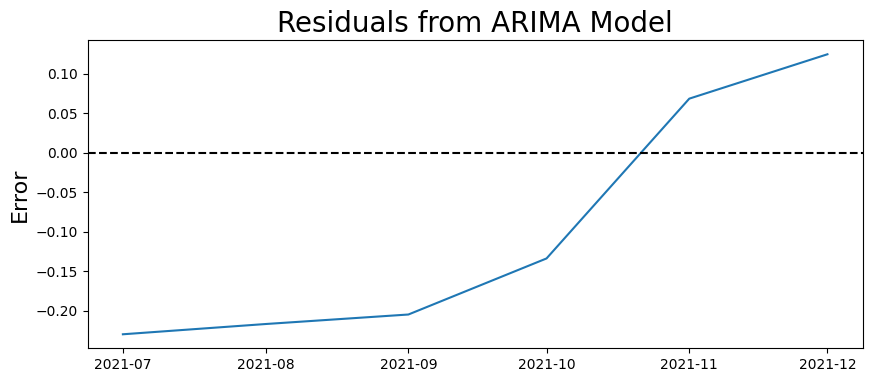

In [24]:
forecast_periods = len(test_data['Construction'])  # Number of periods to forecast
predictions = results.forecast(steps=forecast_periods)
predictions = pd.Series(predictions, index=test_data.index)
predictions
residuals = test_data['Construction'] - predictions
residuals
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.show()

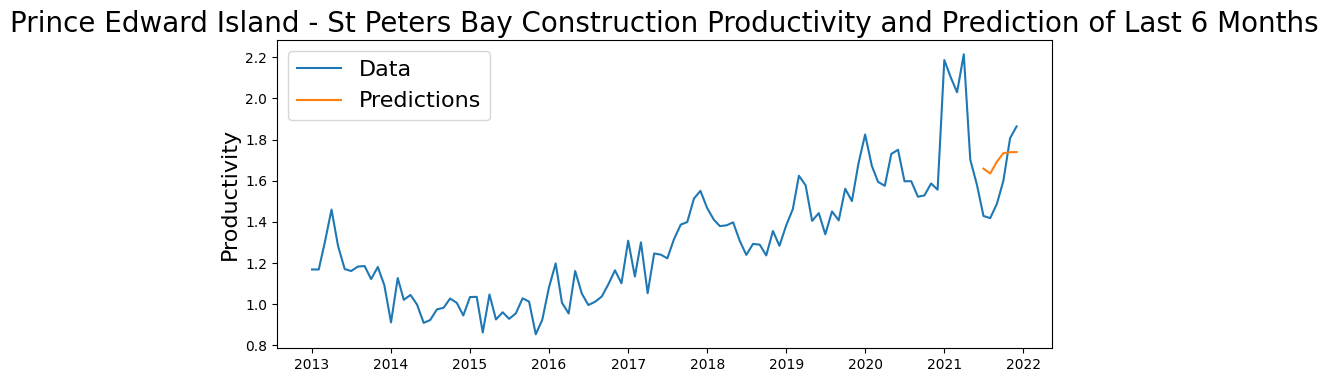

In [27]:
start_date = datetime(2021,6,1)
end_date = datetime(2021,12,1)

plt.figure(figsize=(10,4))

plt.plot(Construction_PetersBay['Construction'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Prince Edward Island - St Peters Bay Construction Productivity and Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [28]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 0.17312992715722408
Mean Absolute Error: 0.1630318341394472
Mean Squared Error: 0.02997397167746572


# SARIMA 
## Construction St. Peters Bay- Prince Edward Island

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
9  1  4 -130.158196 -111.383277
6  1  1 -129.991896 -119.263371
5  1  0 -129.398035 -121.351641
7  1  2 -128.212012 -114.801356
8  1  3 -127.709252 -111.616464
4  0  4 -100.144453  -84.051666
3  0  3  -92.031685  -78.621029
2  0  2  -67.788944  -57.060419
1  0  1  -33.885261  -25.838867
0  0  0   47.870266   53.234529
   p  q         AIC         BIC
5  1  0 -129.398035 -121.351641
6  1  1 -129.991896 -119.263371
7  1  2 -128.212012 -114.801356
8  1  3 -127.709252 -111.616464
9  1  4 -130.158196 -111.383277
4  0  4 -100.144453  -84.051666
3  0  3  -92.031685  -78.621029
2  0  2  -67.788944  -57.060419
1  0  1  -33.885261  -25.838867
0  0  0   47.870266   53.234529


In [30]:
model_SARIMA=SARIMAX(Construction_PetersBay['Construction'],order=(1,1,4),seasonal_order=(1,0,4,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization faile

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Construction   No. Observations:                  108
Model:             SARIMAX(1, 1, 4)x(1, 0, 4, 12)   Log Likelihood                  74.678
Date:                            Sat, 16 Mar 2024   AIC                           -127.357
Time:                                    23:09:09   BIC                            -97.955
Sample:                                01-01-2013   HQIC                          -115.438
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3840      0.382      1.004      0.315      -0.365       1.133
ma.L1         -0.6776      0.401     -1.690      0.091      -1.463       0.108
ma.L2          0.0864      0.192      0.449      0.653      -0.291       0.463
ma.L3         -0.0003      0.119     -0.003      0.998      -0.233       0.232
ma.L4         -0.2014      0.120     -1.674      0.094      -0.437       0.034
ar.S.L12       0.4685      1.683      0.278      0.781      -2.830       3.767
ma.S.L12      -0.3832      1.738     -0.221      0.825      -3.789       3.023
ma.S.L24       0.1556      0.220      0.706      0.480      -0.276       0.588
ma.S.L36      -0.2642      0.319     -0.829      0.407      -0.889       0.361
ma.S.L48       0.1868      0.298      0.628      0.530      -0.396       0.770
sigma2         0.0140      0.002      7.175      0.000       0.010       0.018
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                48.11
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               2.68   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predictions for last 6 months


In [31]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,6,1)
test_dataset_end=datetime(2021,12,1)


train_data=Construction_PetersBay[:train_dataset_end]
test_data=Construction_PetersBay[train_dataset_end+timedelta(days=1):test_dataset_end]


In [32]:
#Fit SARIMA model
my_order = (1,1,4)
my_seasonal_order = (1, 0, 4, 12)
# define model
model = SARIMAX(train_data['Construction'].dropna(), order=my_order, seasonal_order=my_seasonal_order)
model_fit = model.fit()
print(model_fit.summary())

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization faile

                                     SARIMAX Results                                      
Dep. Variable:                       Construction   No. Observations:                  102
Model:             SARIMAX(1, 1, 4)x(1, 0, 4, 12)   Log Likelihood                  69.951
Date:                            Sat, 16 Mar 2024   AIC                           -117.901
Time:                                    23:09:17   BIC                            -89.135
Sample:                                01-01-2013   HQIC                          -106.256
                                     - 06-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0341      0.603     -0.057      0.955      -1.217       1.148
ma.L1         -0.3069      0.640   

Text(0, 0.5, 'Error')

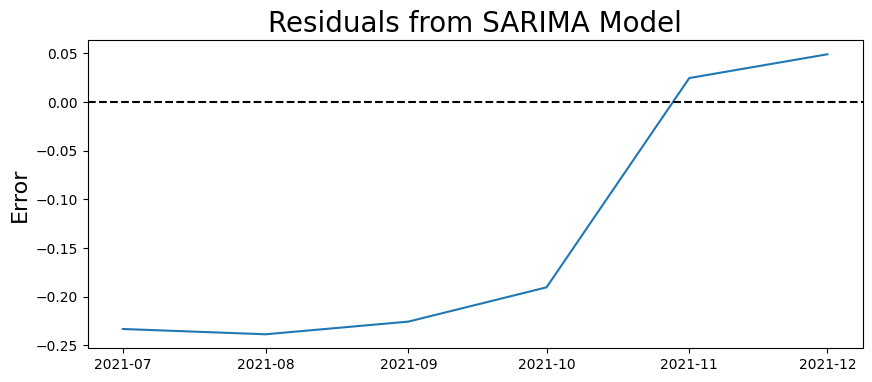

In [33]:
predictions = model_fit.forecast(steps=len(test_data['Construction']))
predictions = pd.Series(predictions, index=test_data.index)
predictions
residuals = test_data['Construction'] - predictions
residuals
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Productivity')

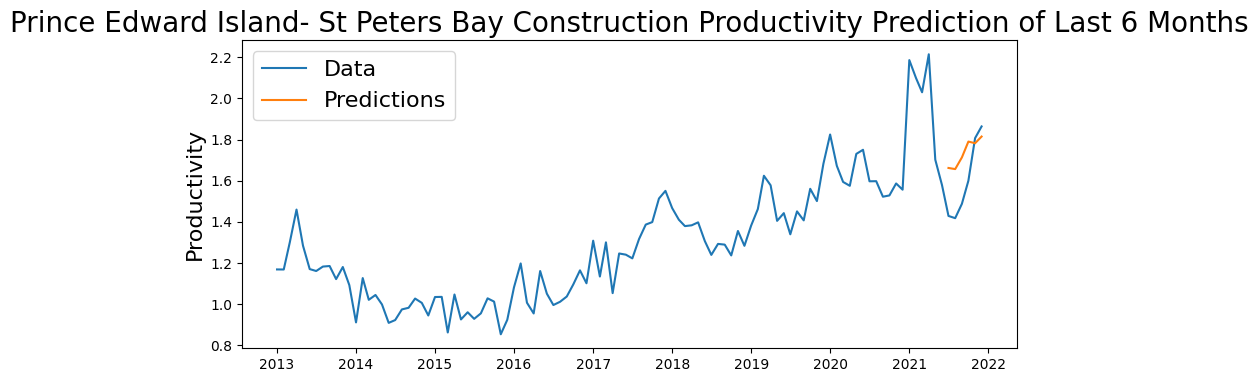

In [34]:
plt.figure(figsize=(10,4))

plt.plot(Construction_PetersBay['Construction'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Prince Edward Island- St Peters Bay Construction Productivity Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)


In [35]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 0.1831855834551851
Mean Absolute Error: 0.16022718359811927
Mean Squared Error: 0.033556957985816586


# ARIMA 
## Transportation Summerside - Prince Edward Island

In [36]:
TransportationSummerside = pd.read_excel('FinalPE.xlsx')

In [37]:
Transportation_Summerside = TransportationSummerside[TransportationSummerside['Station Name'] == 'Summerside'][['Date', 'Transportation']]

In [38]:
Transportation_Summerside.set_index('Date', inplace=True)


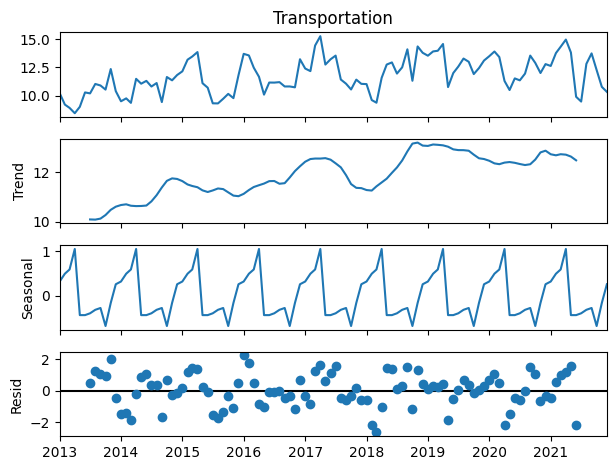

In [39]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(Transportation_Summerside['Transportation'],
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [42]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(Transportation_Summerside)
# Print test statistic
print(result)

(-4.519791560778071, 0.00018106660858660208, 0, 107, {'1%': -3.492995948509562, '5%': -2.888954648057252, '10%': -2.58139291903223}, 299.48902139839197)


In [43]:
#Ho null hypostheis : It is non stationary
#H1 Alternate hypoyhesis : It is stationary

def adfuller_test(y):
    result=adfuller(y)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [44]:
adfuller_test(Transportation_Summerside['Transportation'])

ADF Test Statistic : -4.519791560778071
p-value : 0.00018106660858660208
#Lags Used : 0
Number of Observations Used : 107
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

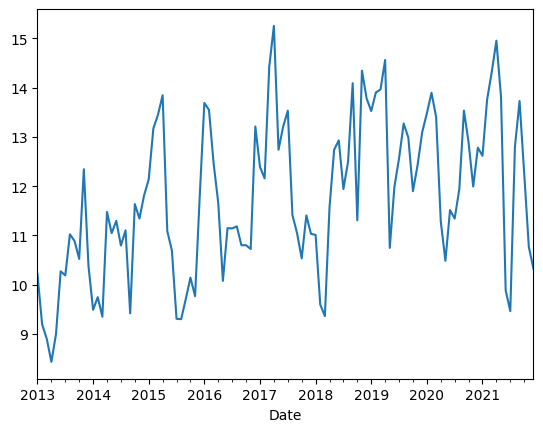

In [45]:
Transportation_Summerside['Transportation'].plot()

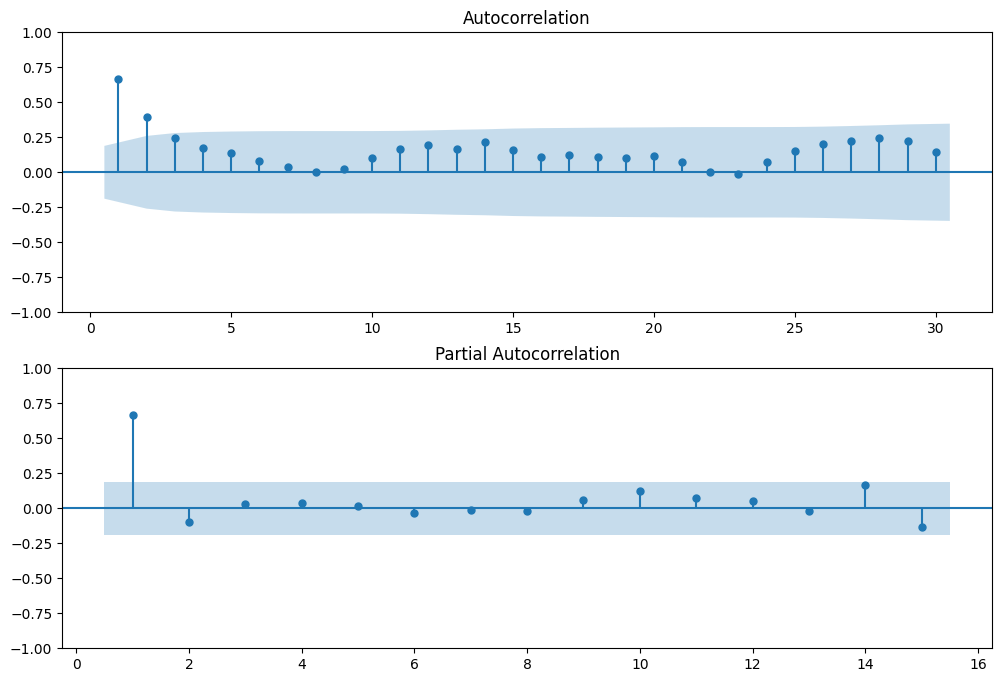

In [46]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(Transportation_Summerside['Transportation'],zero=False,lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(Transportation_Summerside['Transportation'],zero= False,lags=15,ax=ax2)


In [48]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(2):
# Loop over q values from 0-2
    for q in range(2):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = sm.tsa.ARIMA(Transportation_Summerside['Transportation'], order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

In [49]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
2  1  0  344.623286  352.669680
3  1  1  345.714886  356.443411
1  0  1  360.445787  368.492181
0  0  0  407.817089  413.181351
   p  q         AIC         BIC
2  1  0  344.623286  352.669680
3  1  1  345.714886  356.443411
1  0  1  360.445787  368.492181
0  0  0  407.817089  413.181351


In [50]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.ARIMA(Transportation_Summerside['Transportation'], order=(1, 0, 1))
# Fit the model
results_ARIMAX = model.fit()

# Print model fit summary
print(results_ARIMAX.summary())

                               SARIMAX Results                                
Dep. Variable:         Transportation   No. Observations:                  108
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -168.857
Date:                Sat, 16 Mar 2024   AIC                            345.715
Time:                        23:12:31   BIC                            356.443
Sample:                    01-01-2013   HQIC                           350.065
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7284      0.320     36.679      0.000      11.102      12.355
ar.L1          0.5994      0.108      5.555      0.000       0.388       0.811
ma.L1          0.1385      0.131      1.055      0.2

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Use testing data as of last six months

In [51]:
from datetime import datetime, timedelta
import pandas as pd

# Convert index to DateTimeIndex
Transportation_Summerside.index = pd.to_datetime(Transportation_Summerside.index)

train_dataset_end = datetime(2021, 6, 1)
test_dataset_end = datetime(2021, 12, 1)

train_data = Transportation_Summerside[Transportation_Summerside.index <= train_dataset_end]
test_data = Transportation_Summerside[(Transportation_Summerside.index > train_dataset_end) & (Transportation_Summerside.index <= test_dataset_end)]


In [52]:
test_data

,Transportation
Date,
2021-07-01,9.465838
2021-08-01,12.799387
2021-09-01,13.727674
2021-10-01,12.258328
2021-11-01,10.767630
2021-12-01,10.324670


In [53]:
model = sm.tsa.ARIMA(train_data['Transportation'], order=(1, 0, 1))
results = model.fit()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [54]:
forecast_periods = len(test_data['Transportation'])  # Number of periods to forecast
predictions = results.forecast(steps=forecast_periods)
predictions = pd.Series(predictions, index=test_data.index)
predictions



Date
2021-07-01    10.398665
2021-08-01    10.818111
2021-09-01    11.103566
2021-10-01    11.297833
2021-11-01    11.430042
2021-12-01    11.520017
Name: predicted_mean, dtype: float64

In [55]:
residuals = test_data['Transportation'] - predictions
residuals

Date
2021-07-01   -0.932827
2021-08-01    1.981275
2021-09-01    2.624108
2021-10-01    0.960494
2021-11-01   -0.662412
2021-12-01   -1.195347
dtype: float64

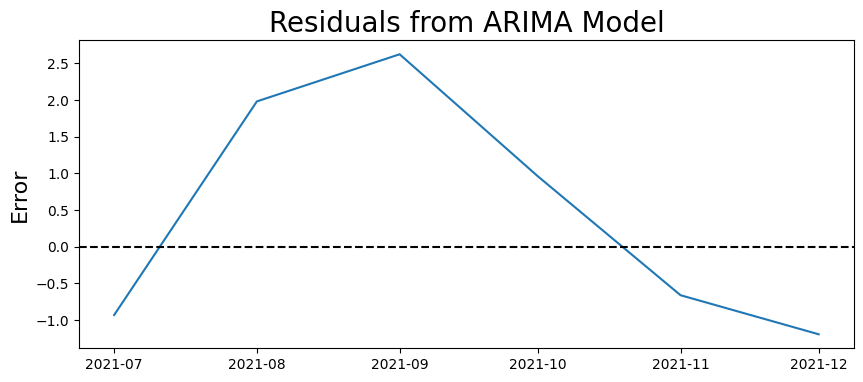

In [56]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.show()

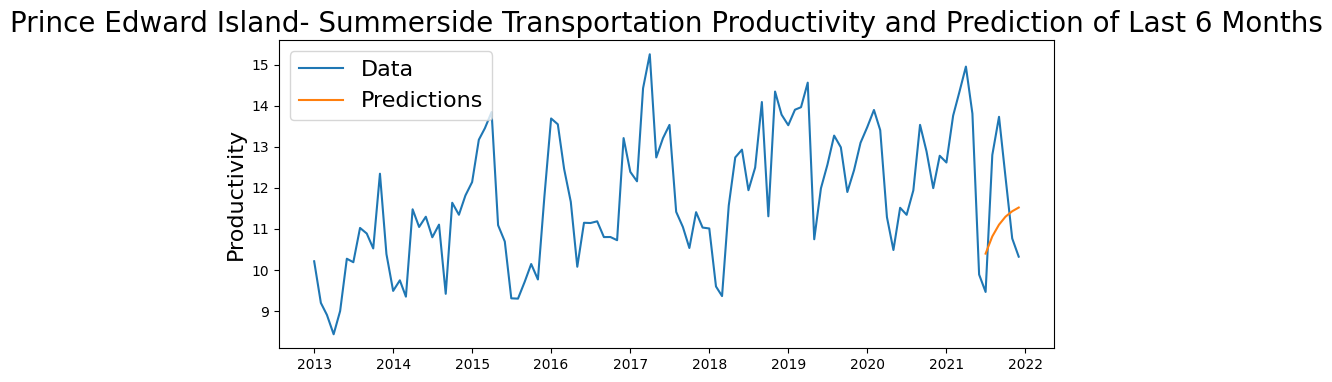

In [57]:
start_date = datetime(2021,6,1)
end_date = datetime(2021,12,1)

plt.figure(figsize=(10,4))

plt.plot(Transportation_Summerside['Transportation'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Prince Edward Island- Summerside Transportation Productivity and Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [58]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 1.5530482887479304
Mean Absolute Error: 1.392743930110851
Mean Squared Error: 2.411958987182875


# SARIMA

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
2  1  0  344.623286  352.669680
3  1  1  345.714886  356.443411
1  0  1  360.445787  368.492181
0  0  0  407.817089  413.181351
   p  q         AIC         BIC
2  1  0  344.623286  352.669680
3  1  1  345.714886  356.443411
1  0  1  360.445787  368.492181
0  0  0  407.817089  413.181351


In [60]:
model_SARIMA=SARIMAX(Transportation_Summerside['Transportation'],order=(0,1,0),seasonal_order=(1,0,1,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                       Transportation   No. Observations:                  108
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -176.503
Date:                              Sat, 16 Mar 2024   AIC                            359.007
Time:                                      23:16:06   BIC                            367.025
Sample:                                  01-01-2013   HQIC                           362.257
                                       - 12-01-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0492      0.976      0.050      0.960      -1.863       1.961
ma.S.L12       0.0537      0.976      0.055      0.956      -1.860       1.967
sigma2         1.5842      0.176      8.976      0.000       1.238       1.930
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):                 8.08
Prob(Q):                              0.38   Prob(JB):                         0.02
Heteroskedasticity (H):               1.49   Skew:                            -0.33
Prob(H) (two-sided):                  0.24   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predictions for last 6 months


In [61]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,6,1)
test_dataset_end=datetime(2021,12,1)


train_data=Transportation_Summerside[:train_dataset_end]
test_data=Transportation_Summerside[train_dataset_end+timedelta(days=1):test_dataset_end]


In [62]:
#Fit SARIMA model
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 12)
# define model
model = SARIMAX(train_data['Transportation'].dropna(), order=my_order, seasonal_order=my_seasonal_order)
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                       Transportation   No. Observations:                  102
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -164.565
Date:                              Sat, 16 Mar 2024   AIC                            335.130
Time:                                      23:16:11   BIC                            342.975
Sample:                                  01-01-2013   HQIC                           338.306
                                       - 06-01-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0401      1.451     -0.028      0.978      -2.885       2.804
ma.S.L12       0.10

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0, 0.5, 'Error')

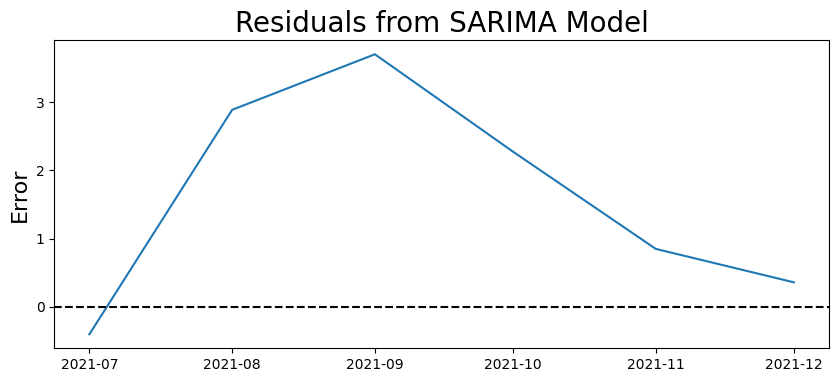

In [63]:
predictions = model_fit.forecast(steps=len(test_data['Transportation']))
predictions = pd.Series(predictions, index=test_data.index)
predictions
residuals = test_data['Transportation'] - predictions
residuals
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Productivity')

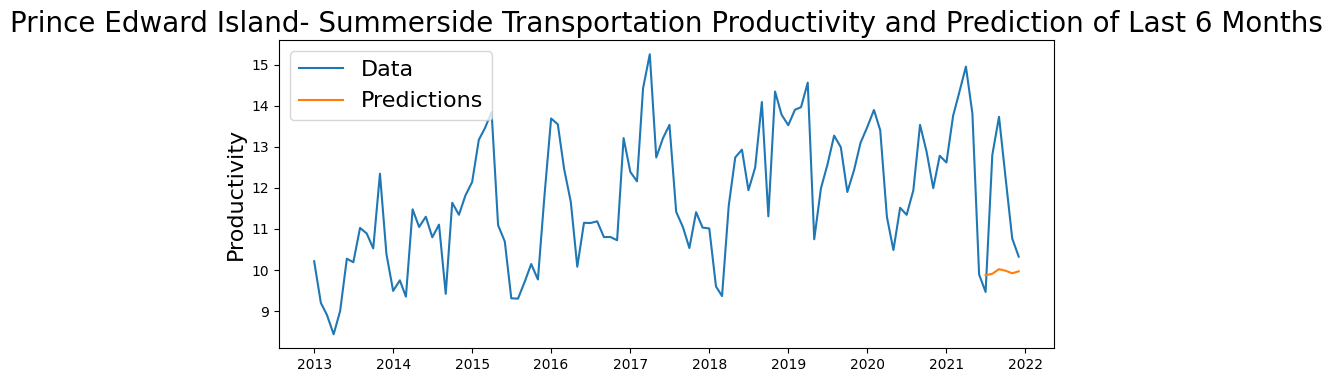

In [64]:
plt.figure(figsize=(10,4))

plt.plot(Transportation_Summerside['Transportation'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Prince Edward Island- Summerside Transportation Productivity and Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)


In [65]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 2.1712880496109626
Mean Absolute Error: 1.7473378594203315
Mean Squared Error: 4.714491794383378


# ARIMA 
## Agriculture East Point - Prince Edward Island

In [66]:
Agriculture = pd.read_excel('FinalPE.xlsx')

In [67]:
Agriculture_EastPoint = Agriculture[Agriculture['Station Name'] == 'East Point'][['Date', 'Agriculture']]

In [68]:
Agriculture_EastPoint.set_index('Date', inplace=True)


In [69]:
Agriculture_EastPoint

,Agriculture
Date,
2013-01-01,0.489742
2013-02-01,0.560339
2013-03-01,0.584379
2013-04-01,0.529690
2013-05-01,0.435956
...,...
2021-08-01,0.670084
2021-09-01,0.530809
2021-10-01,0.637903


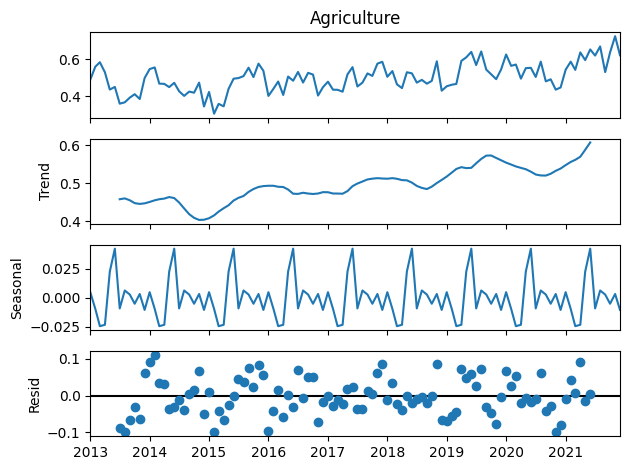

In [70]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(Agriculture_EastPoint['Agriculture'],
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [71]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(Agriculture_EastPoint)
# Print test statistic
print(result)

(-3.0756737520087225, 0.02840660602081958, 1, 106, {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}, -264.514923055567)


In [72]:
#Ho null hypostheis : It is non stationary
#H1 Alternate hypoyhesis : It is stationary

def adfuller_test(y):
    result=adfuller(y)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [73]:
adfuller_test(Agriculture_EastPoint['Agriculture'])

ADF Test Statistic : -3.0756737520087225
p-value : 0.02840660602081958
#Lags Used : 1
Number of Observations Used : 106
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

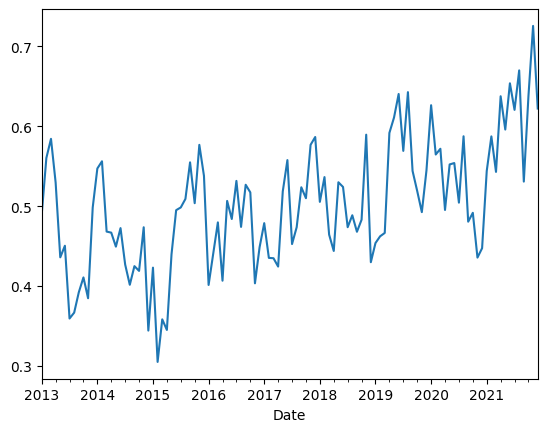

In [74]:
Agriculture_EastPoint['Agriculture'].plot()

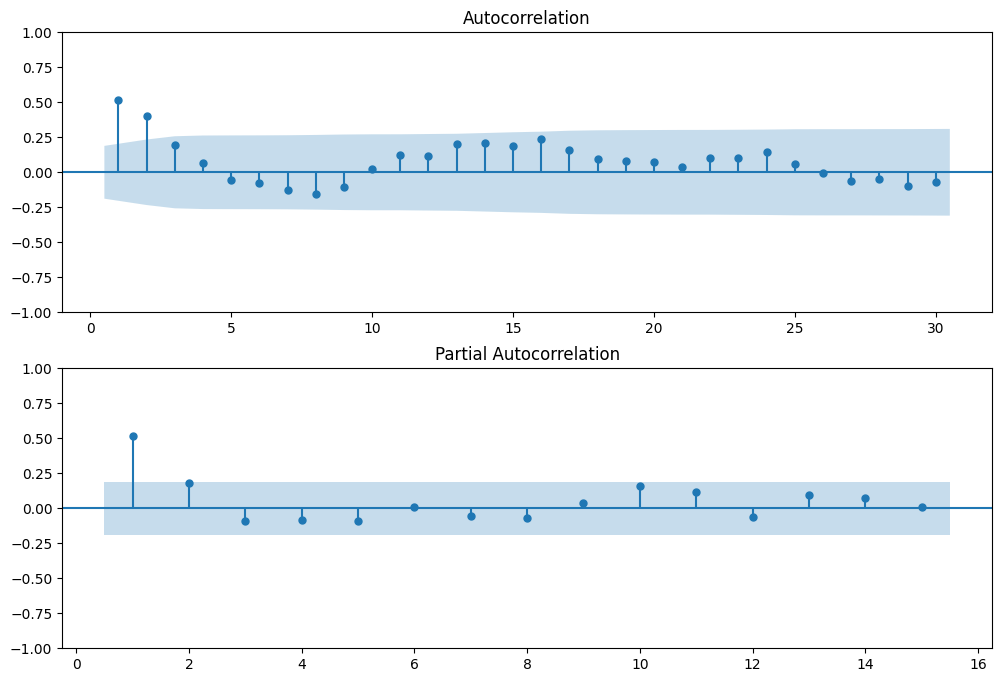

In [79]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(Agriculture_EastPoint['Agriculture'],zero=False,lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(Agriculture_EastPoint['Agriculture'],zero= False,lags=15,ax=ax2)


In [75]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(2):
# Loop over q values from 0-2
    for q in range(2):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = sm.tsa.ARIMA(Agriculture_EastPoint['Agriculture'], order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

In [82]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
5  1  2 -280.960996 -267.550340
4  1  1 -280.253848 -269.525323
3  1  0 -279.601810 -271.555416
2  0  2 -276.999460 -266.270935
1  0  1 -266.694926 -258.648532
0  0  0 -247.064337 -241.700074
   p  q         AIC         BIC
3  1  0 -279.601810 -271.555416
4  1  1 -280.253848 -269.525323
5  1  2 -280.960996 -267.550340
2  0  2 -276.999460 -266.270935
1  0  1 -266.694926 -258.648532
0  0  0 -247.064337 -241.700074


In [76]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.ARIMA(Agriculture_EastPoint['Agriculture'], order=(1, 0, 2))
# Fit the model
results_ARIMAX = model.fit()

# Print model fit summary
print(results_ARIMAX.summary())

                               SARIMAX Results                                
Dep. Variable:            Agriculture   No. Observations:                  108
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 155.074
Date:                Sat, 16 Mar 2024   AIC                           -300.149
Time:                        23:18:40   BIC                           -286.738
Sample:                    01-01-2013   HQIC                          -294.711
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5061      0.021     23.824      0.000       0.464       0.548
ar.L1          0.7682      0.112      6.878      0.000       0.549       0.987
ma.L1         -0.2356      0.161     -1.463      0.1

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Use testing data as of last six months

In [77]:
from datetime import datetime, timedelta
import pandas as pd

# Convert index to DateTimeIndex
Agriculture_EastPoint.index = pd.to_datetime(Agriculture_EastPoint.index)

train_dataset_end = datetime(2021, 6, 1)
test_dataset_end = datetime(2021, 12, 1)

train_data = Agriculture_EastPoint[Agriculture_EastPoint.index <= train_dataset_end]
test_data = Agriculture_EastPoint[(Agriculture_EastPoint.index > train_dataset_end) & (Agriculture_EastPoint.index <= test_dataset_end)]


In [78]:
test_data

,Agriculture
Date,
2021-07-01,0.620640
2021-08-01,0.670084
2021-09-01,0.530809
2021-10-01,0.637903
2021-11-01,0.725759
2021-12-01,0.622290


In [80]:
model = sm.tsa.ARIMA(train_data['Agriculture'], order=(1, 0, 2))
results = model.fit()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [81]:
forecast_periods = len(test_data['Agriculture'])  # Number of periods to forecast
predictions = results.forecast(steps=forecast_periods)
predictions = pd.Series(predictions, index=test_data.index)
predictions



Date
2021-07-01    0.593170
2021-08-01    0.572910
2021-09-01    0.545978
2021-10-01    0.528600
2021-11-01    0.517386
2021-12-01    0.510149
Name: predicted_mean, dtype: float64

In [82]:
residuals = test_data['Agriculture'] - predictions
residuals

Date
2021-07-01    0.027471
2021-08-01    0.097174
2021-09-01   -0.015169
2021-10-01    0.109303
2021-11-01    0.208374
2021-12-01    0.112141
dtype: float64

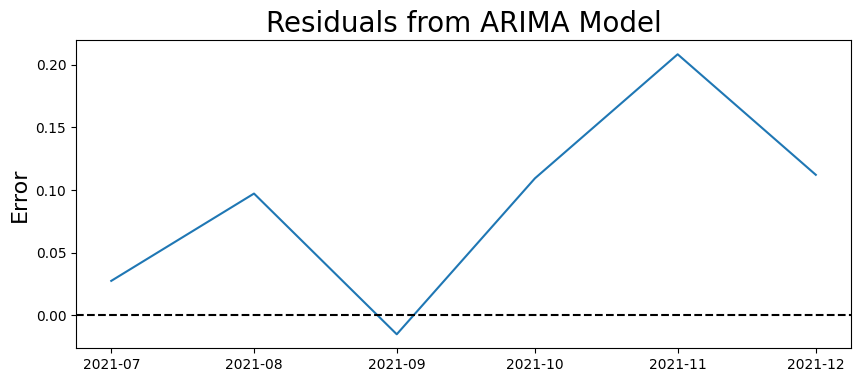

In [83]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.show()

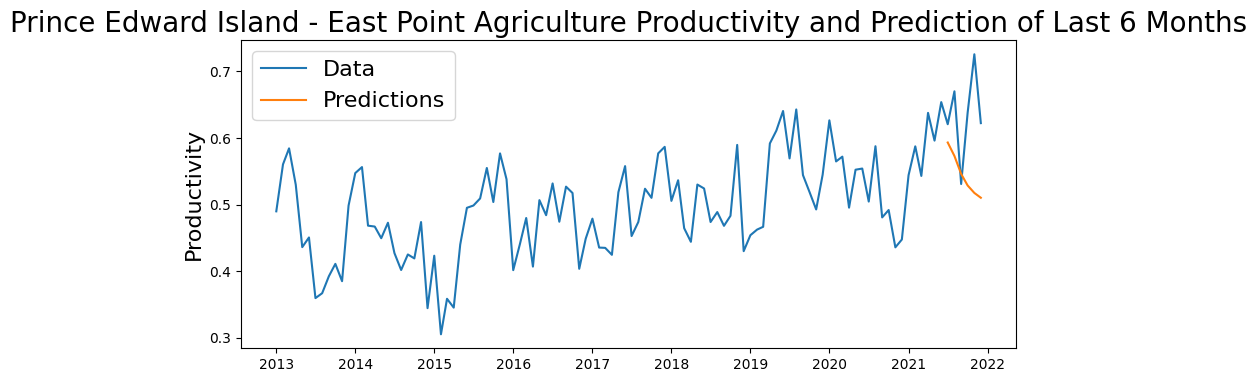

In [84]:
start_date = datetime(2021,6,1)
end_date = datetime(2021,12,1)

plt.figure(figsize=(10,4))

plt.plot(Agriculture_EastPoint['Agriculture'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Prince Edward Island - East Point Agriculture Productivity and Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [85]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 0.11428751855805393
Mean Absolute Error: 0.094938532435198
Mean Squared Error: 0.01306163689815752


# SARIMA

In [86]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
3  1  1 -301.672432 -290.943907
2  1  0 -299.698581 -291.652187
1  0  1 -274.543388 -266.496994
0  0  0 -239.748625 -234.384363
   p  q         AIC         BIC
2  1  0 -299.698581 -291.652187
3  1  1 -301.672432 -290.943907
1  0  1 -274.543388 -266.496994
0  0  0 -239.748625 -234.384363


In [87]:
model_SARIMA=SARIMAX(Agriculture_EastPoint['Agriculture'],order=(1,0,2),seasonal_order=(1,0,2,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\PC\anaconda3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        Agriculture   No. Observations:                  108
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 12)   Log Likelihood                 149.216
Date:                            Sat, 16 Mar 2024   AIC                           -284.431
Time:                                    23:19:17   BIC                           -265.656
Sample:                                01-01-2013   HQIC                          -276.819
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9980      0.042     23.722      0.000       0.916       1.081
ma.L1         -0.4388      0.118     -3.728      0.000      -0.670      -0.208
ma.L2         -0.0735      0.118     -0.623      0.533      -0.305       0.158
ar.S.L12       0.9878      3.040      0.325      0.745      -4.970       6.946
ma.S.L12      -0.9492      3.286     -0.289      0.773      -7.390       5.492
ma.S.L24      -0.0321      0.178     -0.180      0.857      -0.382       0.317
sigma2         0.0036      0.001      3.305      0.001       0.001       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.01
Prob(Q):                              0.71   Prob(JB):                         0.37
Heteroskedasticity (H):               1.08   Skew:                            -0.16
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predictions for last 6 months


In [88]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,6,1)
test_dataset_end=datetime(2021,12,1)


train_data=Agriculture_EastPoint[:train_dataset_end]
test_data=Agriculture_EastPoint[train_dataset_end+timedelta(days=1):test_dataset_end]


In [91]:
#Fit SARIMA model
my_order = (1,0,2)
my_seasonal_order = (1, 0, 2, 12)
# define model
model = SARIMAX(train_data['Agriculture'].dropna(), order=my_order, seasonal_order=my_seasonal_order)
model_fit = model.fit()
print(model_fit.summary())

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                     SARIMAX Results                                      
Dep. Variable:                        Agriculture   No. Observations:                  102
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 12)   Log Likelihood                 142.921
Date:                            Sat, 16 Mar 2024   AIC                           -271.842
Time:                                    23:19:42   BIC                           -253.467
Sample:                                01-01-2013   HQIC                          -264.402
                                     - 06-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9987      0.042     23.997      0.000       0.917       1.080
ma.L1         -0.3788      0.120   

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0, 0.5, 'Error')

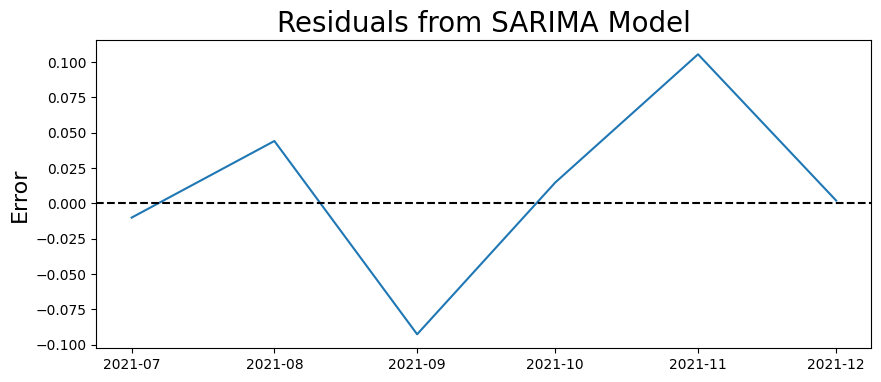

In [92]:
predictions = model_fit.forecast(steps=len(test_data['Agriculture']))
predictions = pd.Series(predictions, index=test_data.index)
predictions
residuals = test_data['Agriculture'] - predictions
residuals
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Productivity')

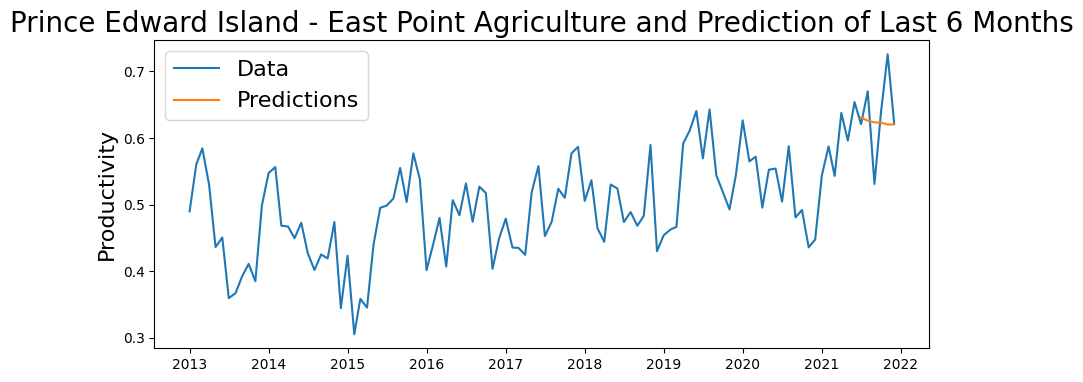

In [93]:
plt.figure(figsize=(10,4))

plt.plot(Agriculture_EastPoint['Agriculture'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Prince Edward Island - East Point Agriculture and Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)


In [94]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 0.06052723307321567
Mean Absolute Error: 0.044850637838536045
Mean Squared Error: 0.003663545943499373
